# Data 200: Database Systems and Data Management for Data Analytics


# Take-Home Final Exam

**Dickinson College**<br/>
**Fall 2022**<br/>
Prof. Eren Bilen<br/>
<font color='red'>**Due Date:** Friday December 16, 12pm (noon) </font>
---
Enter your name in the markdown cell below.

# Name:

In [1]:
from selenium import webdriver
import pandas as pd
import re
import time 
import random
import matplotlib.pyplot as plt

# Scraping task

On this exam, you will scrape reviews from BestBuy.com. The item from which you will scrape reviews for will depend on the first letter of your last name. Check the table below (both letters inclusive) for your assigned item:

|First letter of your last name | Item/link to reviews on BestBuy.com
| :---        |    :---   |
|A-G | https://www.bestbuy.com/site/reviews/microsoft-xbox-series-x-1tb-console-black/6428324?variant=A&skuId=6428324
|H-M | https://www.bestbuy.com/site/reviews/apple-airpods-with-charging-case-2nd-generation-white/6084400?variant=A&skuId=6084400
|N-S | https://www.bestbuy.com/site/reviews/samsung-65-class-7-series-led-4k-uhd-smart-tizen-tv/6401722?variant=A&skuId=6401722
|T-Z | https://www.bestbuy.com/site/reviews/nintendo-switch-32gb-lite-turquoise/6257139?variant=A&skuId=6257139


Your goal is to scrape 2,000 reviews that were posted in the reviews page of your assigned item. The format of your output should be a dataframe with the following columns/format:
<br>
![title](ss1.png)

where
```
username: the user name of the reviewer
review: the review content
rating: the rating (out of 5) left by the reviewer
helpful: the number of votes received on the review indicating that the review is helpful
unhelpful: the number of votes received on the review indicating that the review is unhelpful
net: |helpful - unhelpful| i.e., the absolute value of the difference between "helpful" and "unhelpful" votes
nethelpful: helpful - unhelpful i.e., the difference between "helpful" and "unhelpful" votes
total: total number of votes (helpful + unhelpful) received
length: length of the review, defined as the number of characters in a review (including whitespace)
```

Include the `.ipynb` and `.md` versions of your work + the following two scatterplots as part of your output. Comment on what you observe from the scatterplots. Are you surprised?
* scatterplot with `length` on the x axis, `total` on the y axis
* scatterplot with `length` on the x axis, `nethelpful` on the y axis

Commit and push on Github once you finish.

Hints: 
* You will need to scrape multiple pages. Make sure to wait at least 2 seconds between each page, e.g., using `time.sleep(random.uniform(2, 3))`.
* Trim away `\n` from review strings as it contains no useful information, and can cause bugs in regex.
* Make sure to get the position of the "next Page" button, as its position can change dynamically depending on the page number.

Good luck!

In [2]:
# This solution iterates over list element position of each review

import pandas as pd
from selenium import webdriver
import re
import time
import random

def get_reviews():
    reviews=[]
    for i in range(1,21):
        # get username
        username = driver.find_element('xpath',\
                                       '//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[1]/div[1]'\
                                       .format(i)).text
        # get rating (out of 5)
        rating = re.findall('\d{1}', \
            driver.find_element('xpath',\
                                '//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[1]'\
                                .format(i)).text)[0]
        # get comment text
        review = driver.find_element('xpath',\
                                      '//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[4]'\
                                      .format(i)).text
        # "helpful" votes
        helpful = re.findall('(\d{1,6})',\
            driver.find_element('xpath',\
                                '//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[6]'\
                                .format(i)).text)[0]
        # "unhelpful" votes
        unhelpful = re.findall('(\d{1,6})',\
            driver.find_element('xpath',\
                                '//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[6]'\
                                .format(i)).text)[1]
        reviews.append([username,rating,review,helpful,unhelpful])
    return reviews

driver = webdriver.Chrome('/users/bilene/downloads/chromedriver')
driver.get('https://www.bestbuy.com/site/reviews/sony-playstation-5-console/6523167?variant=A&skuId=6523167')

# declare the object to be populated
df_out = pd.DataFrame()

for j in range(100):
    # get reviews data from the current page
    reviews = get_reviews()

    # df with the current page data
    df = pd.DataFrame(reviews,\
                      columns=['username','rating','review','helpful','unhelpful'])

    # df_out with the entire data
    df_out = pd.concat([df_out,df])

    # find the location of the next page button, then click on it!
    button = driver.find_element('xpath','//*[@title="next Page"]')
    button.click()
    
    # wait between 2-3 seconds
    time.sleep(random.uniform(2,3))
    
# define/clean variables in df
df_out['helpful'] = df_out['helpful'].astype('int')
df_out['unhelpful'] = df_out['unhelpful'].astype('int')
df_out['net'] = (df_out['helpful'] - df_out['unhelpful']).abs()
df_out['nethelpful'] = df_out['helpful'] - df_out['unhelpful']
df_out['total'] = df_out['helpful'] + df_out['unhelpful']
df_out['length'] = df_out.review.str.len()

/var/folders/s8/yjbnvt692lxfhgjfc9mzg65s53t5fq/T/ipykernel_21504/2756127100.py:38: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/users/bilene/downloads/chromedriver')


In [3]:
df_out

,username,rating,review,helpful,unhelpful,net,nethelpful,total,length
0,Tdox,5,Going over hardware and software. Not going ov...,203,155,48,48,358,5667
1,usmank,5,I'm a big Sony buff when it comes to gaming. I...,0,0,0,0,0,937
2,Ina100years,5,"It was quite difficult to pre-order the PS5, b...",713,542,171,171,1255,1245
3,WonettaP,5,I am in love with my ps5. I have been Team Xbo...,0,0,0,0,0,474
4,LostMind,5,"This box is the bomb, as is the Xbox X I'd say...",2,1,1,1,3,587
...,...,...,...,...,...,...,...,...,...
15,BB127,5,Love the ps5! Hope everyone gets theirs! Its a...,0,1,1,-1,1,148
16,Bubbaloo,5,It was so hard to get but after countless atte...,0,1,1,-1,1,756
17,Freddy,5,Enjoy getting the PS5 now I'm just waiting for...,0,0,0,0,0,69
18,Dadguy23,5,The future is here this is Blade Runner 2049 t...,0,0,0,0,0,809


In [4]:
# Here is an approach that uses regex heavily in case this is the route you took (not recommended, but
# it does the job) You won't lose points if you regex'd your way through the solution!

from selenium import webdriver
import pandas as pd
import re
import time 
import random
import matplotlib.pyplot as plt

def trim_review():
    '''
    trim with seperate regex depending on the comment patterns
    '''
    trimmed = re.findall('ago.(.*?)Helpful\s\(', s)
    review =[]
    # need to regex separately for different cases
    for i in range(len(trimmed)):
        # regex
        if ('when reviewed.' in trimmed[i]) & ('This review is from' in trimmed[i]):
            review.append(re.findall('when reviewed.(.*)This review is from', trimmed[i])[0])
        # no need for regex here, split can do fine:
        elif ('when reviewed.' in trimmed[i]) & ('This review is from' not in trimmed[i]):
            review.append(trimmed[i].split('when reviewed.')[1])
        else:
            review.append(trimmed[i])
    return review


driver = webdriver.Chrome('/users/bilene/downloads/chromedriver')
driver.get('https://www.bestbuy.com/site/reviews/sony-playstation-5-console/6523167?variant=A&skuId=6523167')
df_out = pd.DataFrame()

for j in range(100):

    # gets all review blocks on page
    listing_element = driver.find_element('xpath','//*[@id="reviews-accordion"]/div[1]/ul').text

    # split by '\n'
    listing = pd.DataFrame(listing_element.split('\n'),columns=['content'])

    # one line above the line that begins with "Rated" returns the usernames
    usernames = listing[listing.index.isin(listing[(listing.content.str[0:5]=='Rated')].index-1)].reset_index(drop=True)
    usernames.columns = ['username']
    usernames

    # get rid of \n in text
    s = listing_element
    s = s.replace("\n\n","")
    s = s.replace("\n","")
    
    # trim reviews via regex
    review = trim_review()

    # let's get helpful count
    rating = re.findall('Rated\s(\d*?)\s', s)
    helpful = re.findall('Helpful\s\((\d*?)\)', s)
    unhelpful = re.findall('Unhelpful\s\((\d*?)\)', s)

    # populate df
    df = pd.DataFrame({'username': usernames.username,'review':review, 'rating':rating,\
                       'helpful':helpful,'unhelpful':unhelpful})
    
    # get rid of "Read More" if it occurs
    df['review'] = df.review.str.replace('Read More','')
    
    # get rid of "I would recommend this", "No, I would not recommend this"
    df['review'] = df.review.str.replace('I would recommend this to a friend','')
    df['review'] = df.review.str.replace('No, I would not recommend this to a friend','')

    # define/clean variables in df
    df['helpful'] = df['helpful'].astype('int')
    df['unhelpful'] = df['unhelpful'].astype('int')
    df['net'] = (df['helpful'] - df['unhelpful']).abs()
    df['nethelpful'] = df['helpful'] - df['unhelpful']
    df['total'] = df['helpful'] + df['unhelpful']
    df['length'] = df.review.str.len()

    df_out = pd.concat([df_out,df])

    button = driver.find_element('xpath','//*[@title="next Page"]')
    button.click()
    
    # random wait
    wait_time = random.uniform(2, 3)
    time.sleep(wait_time)
        
df_out = df_out.reset_index(drop=True)

/var/folders/s8/yjbnvt692lxfhgjfc9mzg65s53t5fq/T/ipykernel_21504/47305721.py:30: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/users/bilene/downloads/chromedriver')


In [5]:
df_out

,username,review,rating,helpful,unhelpful,net,nethelpful,total,length
0,Tdox,Going over hardware and software. Not going ov...,5,203,155,48,48,358,5572
1,usmank,I'm a big Sony buff when it comes to gaming. I...,5,0,0,0,0,0,937
2,Ina100years,"It was quite difficult to pre-order the PS5, b...",5,713,542,171,171,1255,1237
3,WonettaP,I am in love with my ps5. I have been Team Xbo...,5,0,0,0,0,0,472
4,LostMind,"This box is the bomb, as is the Xbox X I'd say...",5,2,1,1,1,3,587
...,...,...,...,...,...,...,...,...,...
1995,BB127,Love the ps5! Hope everyone gets theirs! Its a...,5,0,1,1,-1,1,148
1996,Bubbaloo,It was so hard to get but after countless atte...,5,0,1,1,-1,1,750
1997,Freddy,Enjoy getting the PS5 now I'm just waiting for...,5,0,0,0,0,0,69
1998,Dadguy23,The future is here this is Blade Runner 2049 t...,5,0,0,0,0,0,804


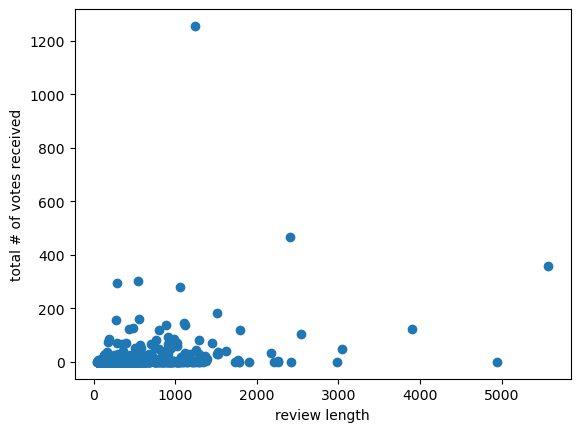

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df_out.length,df_out.total)
plt.xlabel('review length')
plt.ylabel('total # of votes received')
plt.savefig('plot1.png',dpi=300)
plt.show()

It appears longer reviews attract more votes. I think this is expected. More content means more to think/read about!

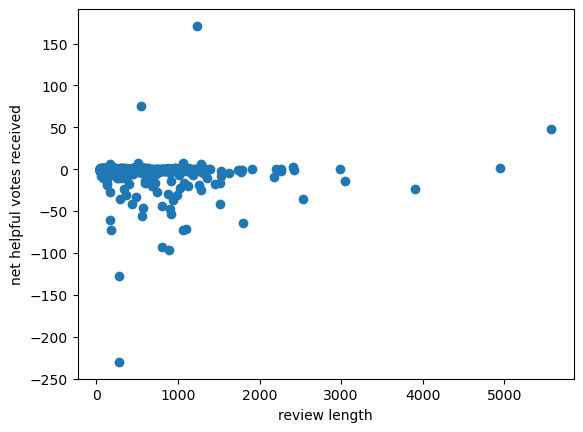

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df_out.length,df_out.nethelpful)
plt.xlabel('review length')
plt.ylabel('net helpful votes received')
plt.savefig('plot2.png',dpi=300)
plt.show()

It appears longer reviews do better in terms of receiving votes for helpfulness. I think it is surprising that the about 34% of reviews received a negative net helpful vote, while only 2.8% received a positive net helpful vote.

In [12]:
print(len(df_out[df_out.nethelpful<0])/len(df_out))
print(len(df_out[df_out.nethelpful>0])/len(df_out))

0.337
0.0285
